In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

___
## Basic Facts About The Data

The data set contains many numerical features and a label indicating whether the university is public or private. A full description of these features is:

* <b>Private</b>: Label with values Yes, No indicating private or public university (resp.)
* <b>Apps</b>: Number of applications received
* <b>Accept</b>: Number of applications accepted
* <b>Enroll</b>: Number of new students enrolled
* <b>Top10perc</b>: Percentage new students from top 10% of H.S. class
* <b>Top25perc</b>: Percentage new students from top 25% of H.S. class
* <b>F.Undergrad</b>: Number of fulltime undergraduates
* <b>P.Undergrad</b>: Number of parttime undergraduates
* <b>Outstate</b>: Out-of-state tuition (dollars)
* <b>Room.Board</b>: Room and board costs (dollars)
* <b>Books</b>: Estimated book costs (dollars)
* <b>Personal</b>: Estimated personal spending (dollars)
* <b>PhD</b>: Percentage of faculty with Ph.D.s
* <b>Terminal</b>: Percentage of faculty with terminal degree
* <b>S.F.Ratio</b>: Student/faculty ratio
* <b>perc.alumni</b>: Percentage alumni who donate
* <b>Expend</b>: Instructional expenditure per student
* <b>Grad.Rate</b>: Graduation rate

The goal is to be able to predict if a university is public or private based on its values for each of these features.

In [3]:
data = pd.read_csv('College_Data', index_col=0)

In [4]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [11]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


____
## Exploratory Data Analysis

Let's get a sense of how the different features relate to each other, and in particular how the relationships very based on the **private** label.

Text(0.5, 1.0, 'Room and Board Cost vs. Out-of-state Tuition')

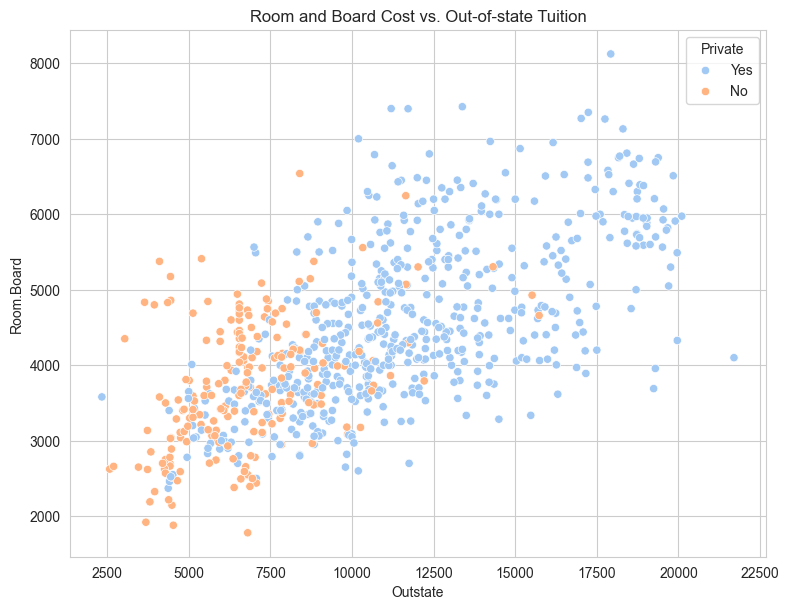

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, y='Room.Board', x='Outstate', hue='Private', palette='pastel')
plt.tight_layout()
plt.title('Room and Board Cost vs. Out-of-state Tuition')

As one would expect, the cost of room and board increases as the out-of-state tuition increases, irrespective of the private/public status of the university. However, we see that the public universities are mostly isolated in the lower left quadrant of this plot, meaning they are cheaper overall.

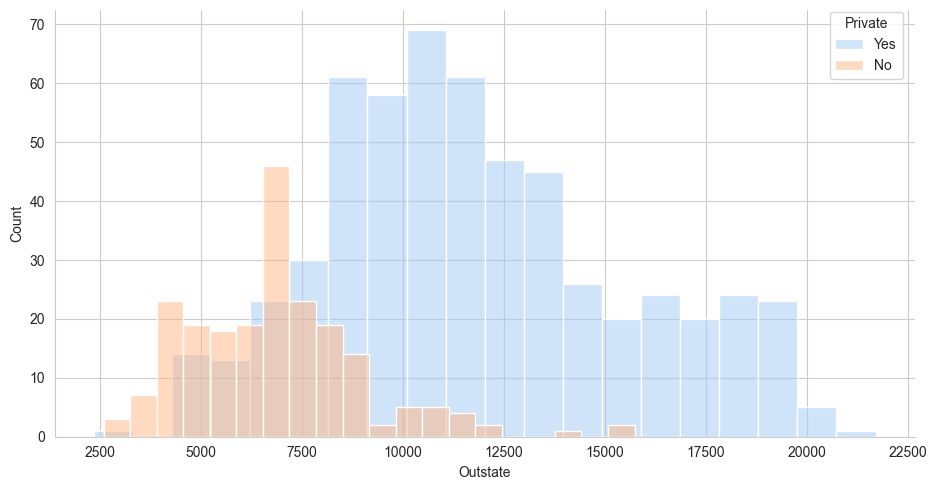

In [64]:
g = sns.FacetGrid(data, hue='Private', height=5,aspect=1.75, palette='pastel')
g.map_dataframe(sns.histplot, x='Outstate', alpha=0.5, bins=20)
g.add_legend(bbox_to_anchor=(.965, .9), frameon=True)
plt.tight_layout()

Here we can see the distributions of the university tuitions, categorized by their private/public status. This provides another way to see that public universities tend to be cheaper.

Let's see how the financial information interacts with basic demographic information.

Text(0.5, 1.0, 'Full-time Undergrad Population vs. Out-of-state tuition')

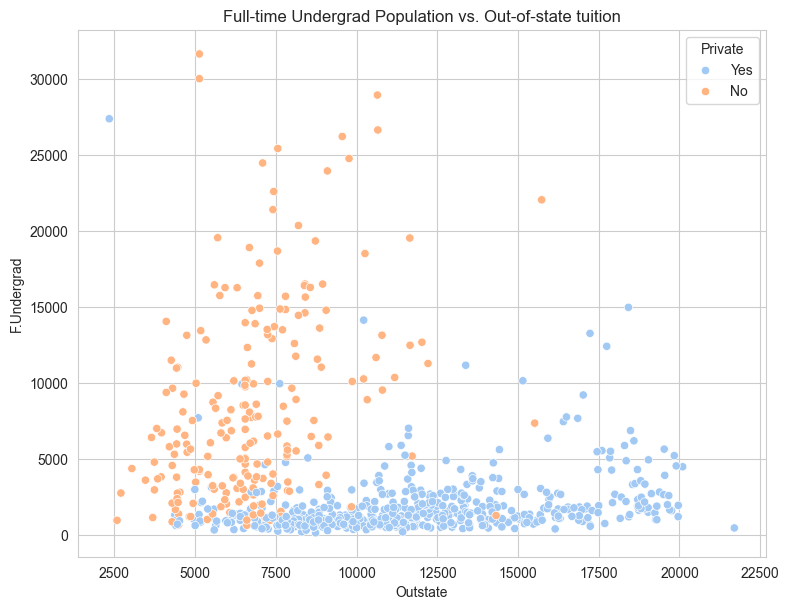

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, y='F.Undergrad', x='Outstate', hue='Private', palette='pastel')
plt.tight_layout()
plt.title('Full-time Undergrad Population vs. Out-of-state tuition')

The undergraduate population of private universities does not change much based on tuition, whereas there is a strong positive correlation between tuition and undergrad population at public universities. We can draw two preliminary conclusions from this:
1. Public universities are overall more populated than private universities, and
2. Larger public universities charge more than smaller ones

We also notice that this data is (approximately) linearly separable.

We know that the **Room.Board** and **Outstate** features are directly proportional to each other. How does **Room.Board** relate to the graduate rate, **Grad.Rate**?

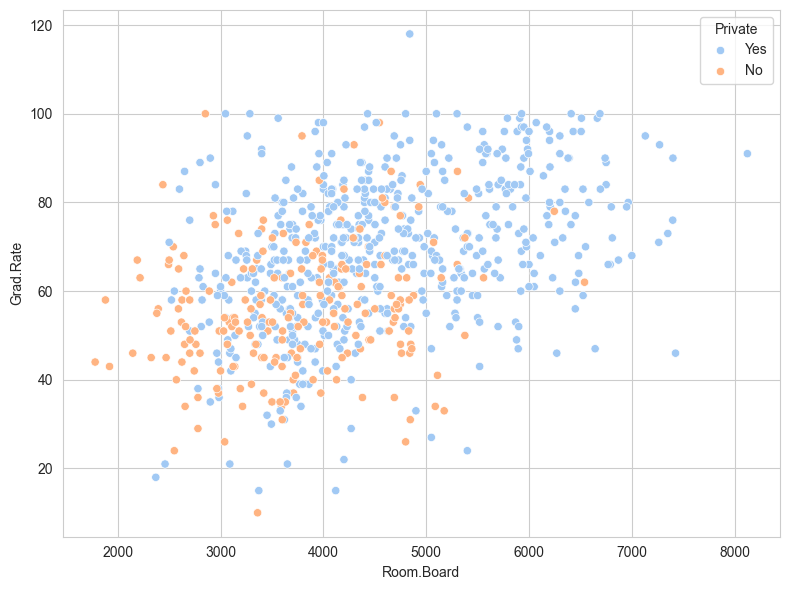

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Room.Board', y='Grad.Rate', hue='Private', palette='pastel')
plt.tight_layout()

Public universities tend to have a lower graduate rate than private ones. For both types of university, there is an overall positive correlation between room and board cost and graduation rate.

We also see that there is a private university in our data set with a graduation rate >100%. We'll deal with that later.

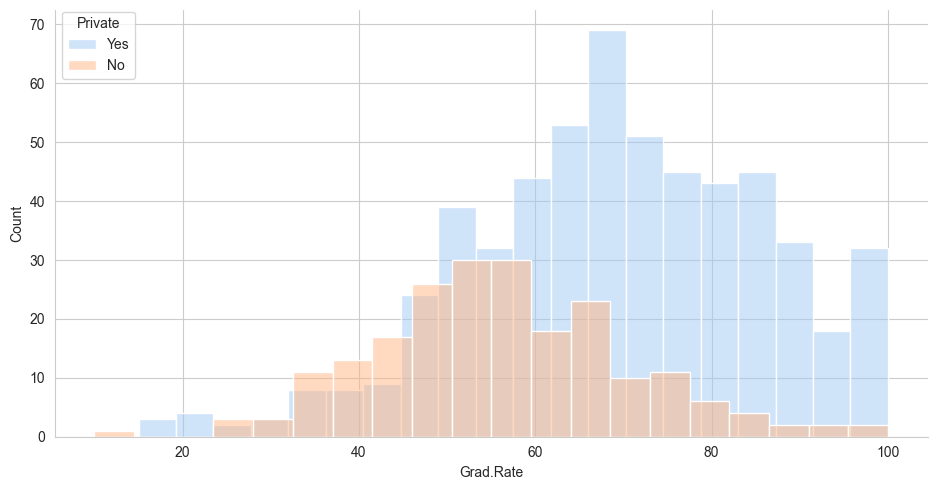

In [56]:
g2 = sns.FacetGrid(data, hue='Private', height=5,aspect=1.75, palette='pastel')
g2.map_dataframe(sns.histplot, x='Grad.Rate', alpha=0.5, bins=20)
g2.add_legend(bbox_to_anchor=(0.155, .9), frameon=True)
plt.tight_layout()

Here's a view of the distribution of graduation rates, separated based on private/public status. We see more clearly how public universities tend to have a lower graduate rate.

The university whose graduation rate was set to be over 100 is:

In [7]:
data[data['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


We will assume that it is acceptable to set the rate to 100%, and that the error is an honest one.

In [18]:
data.loc['Cazenovia College', 'Grad.Rate']=100

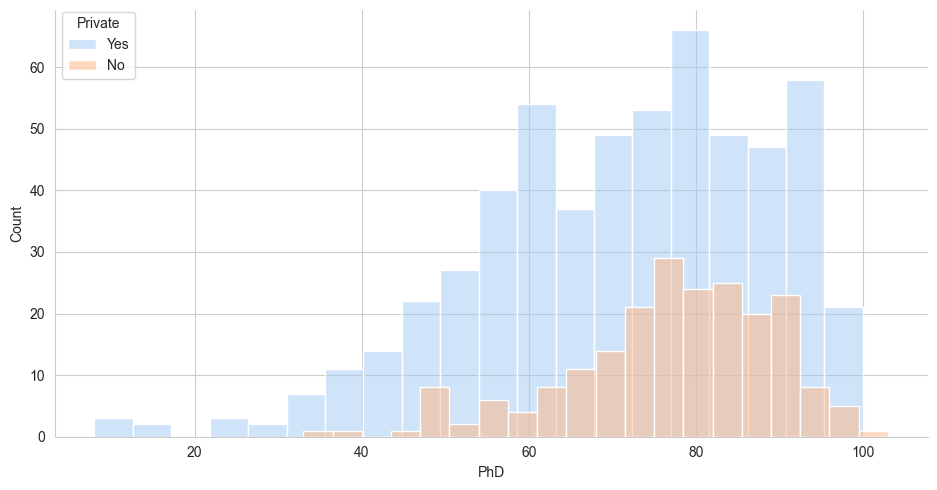

In [55]:
g3 = sns.FacetGrid(data, hue='Private', height=5,aspect=1.75, palette='pastel')
g3.map_dataframe(sns.histplot, x='PhD', alpha=0.5, bins=20)
g3.add_legend(bbox_to_anchor=(0.155, .9), frameon=True)
plt.tight_layout()

Both types of university considered here tend to have a faculty PhD percentage of about 80%. The respective public/private distributions are about the same.

Text(0.5, 1.0, 'Out-of-state tuition vs. Number Faculty w/ PhDs')

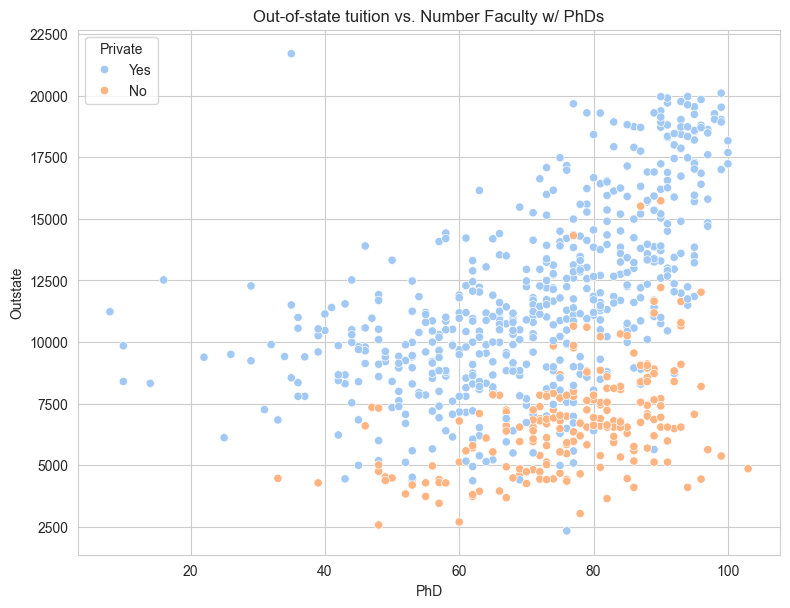

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, y='Outstate', x='PhD', hue='Private', palette='pastel')
plt.tight_layout()
plt.title('Out-of-state tuition vs. Number Faculty w/ PhDs')

For both types of university, the tuition tends to increase as the percentage of PhDs in the faculty increases. Based on this, we could infer that universities (public and private) charge more based on qualifications of their professors.

____
## K Means Cluster Creation

We are using this data set to learn K Means Clustering. We can think of this as supervised learning, only applied to the student: in the real world, clustering would be used to discern what kinds of patterns exist in data, and is an unspervised machine learning algorithm. This is a great tool for learning about the data when the labels are not known; we have the benefit of having the labels. Hence, we are supervising learning this machine learning algorithm by first pretending we don't know the labels, and then using the labels to evalue the performance of the clustering model.

In [65]:
from sklearn.cluster import KMeans

We are interested in classifying the data based on a binary label (public/private). Therefore, we're interested in a clustering model with two clusters. The model is trained without the label included.

In [66]:
km = KMeans(n_clusters = 2)
km.fit(data.drop('Private', axis=1))

In [23]:
km.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

____
## Evaluation
We'll translate our 'Yes'/'No' values in the **Private** column into 1/0 to make evaluation easier. We can then evaluate our model as if it were logistic regression: using a classification report and a confusion matrix.

In [68]:
data['Cluster']=data['Private'].map(lambda x: 1 if x.lower()=='yes' else 0)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

In [70]:
print('Classification Report: \n', classification_report(data['Cluster'], km.labels_))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(data['Cluster'], km.labels_))



Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



Confusion Matrix: 
 [[ 74 138]
 [ 34 531]]


The model does a decent job of classifying the data. The recall on predicting **Private**=1 is very good, but we also need to keep in mind that the data is unbalanced.

____
### Comparison To Logistic Regression
Let's see how a basic logistic regression model would do at classifying the data.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [79]:
X = data.drop(['Private', 'Cluster'], axis=1)
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [82]:
pred = pipe.predict(X_test)
print('Classification Report (logreg): \n', classification_report(y_test, pred))
print('\n')
print('Confusion Matrix (logreg): \n', confusion_matrix(y_test, pred))


Classification Report (logreg): 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        67
           1       0.95      0.96      0.96       190

    accuracy                           0.94       257
   macro avg       0.92      0.91      0.92       257
weighted avg       0.94      0.94      0.94       257



Confusion Matrix (logreg): 
 [[ 58   9]
 [  7 183]]


Evidently we are able to train a (linear) logistic regression model to predict whether or not a university is private.